In [369]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [370]:
import warnings
import types
warnings.simplefilter(action='ignore', category=FutureWarning)

In [371]:
autor = pd.read_csv('autores.csv')
docente = pd.read_csv('docente.csv')
publ = pd.read_csv('publicacao.csv')
qualis = pd.read_csv('qualis_score.csv')

# Carolina tem que ficar no TOP 5
### Heitor não

In [372]:
autor

,id_publicacao,id_autor
0,164,10
1,165,3
2,77,9
3,121,1
4,144,6
...,...,...
256,29,5
257,156,5
258,155,4
259,171,7


In [373]:
docente

,id,nome,idade_doutorado
0,1,Alex,7
1,2,Beto,10
2,3,Carolina,5
3,4,Debora,10
4,5,Eric,7
5,6,Fabiana,7
6,7,Gabriela,12
7,8,Heitor,11
8,9,Iara,9
9,10,Juca,11


In [374]:
publ

,id,tipo,qualis,ano
0,1,E,B1,2020
1,2,P,B1,2022
2,3,E,A3,2023
3,4,E,B4,2021
4,5,P,A4,2023
...,...,...,...,...
184,185,P,A1,2020
185,186,E,A1,2023
186,187,E,A4,2023
187,188,E,B4,2021


In [375]:
qualis

,qualis,tipo,score,restrito
0,A1,E,1.00000,True
1,A2,E,0.87500,True
2,A3,E,0.75000,True
3,A4,E,0.62500,True
4,B1,E,0.50000,False
5,B2,E,0.20000,False
6,B3,E,0.10000,False
7,B4,E,0.05000,False
8,A1,P,1.25000,True
9,A2,P,1.09375,True


In [376]:
publ.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

,id,tipo,qualis,ano,score,restrito
0,1,E,B1,2020,0.50000,False
1,2,P,B1,2022,0.62500,False
2,3,E,A3,2023,0.75000,True
3,4,E,B4,2021,0.05000,False
4,5,P,A4,2023,0.78125,True
...,...,...,...,...,...,...
184,185,P,A1,2020,1.25000,True
185,186,E,A1,2023,1.00000,True
186,187,E,A4,2023,0.62500,True
187,188,E,B4,2021,0.05000,False


In [377]:
autor.merge(docente,left_on='id_autor',right_on='id',how='inner').drop('id',axis=1)

,id_publicacao,id_autor,nome,idade_doutorado
0,164,10,Juca,11
1,165,3,Carolina,5
2,77,9,Iara,9
3,121,1,Alex,7
4,144,6,Fabiana,7
...,...,...,...,...
256,29,5,Eric,7
257,156,5,Eric,7
258,155,4,Debora,10
259,171,7,Gabriela,12


In [378]:
publ.merge(autor,left_on='id',right_on='id_publicacao',how='inner').drop('id',axis=1)

,tipo,qualis,ano,id_publicacao,id_autor
0,E,B1,2020,1,4
1,P,B1,2022,2,1
2,P,B1,2022,2,5
3,E,A3,2023,3,9
4,E,B4,2021,4,6
...,...,...,...,...,...
256,P,A1,2020,185,3
257,E,A1,2023,186,3
258,E,A4,2023,187,4
259,E,B4,2021,188,6


In [379]:
all_merge = publ.merge(
    autor.merge(
        docente
        ,left_on='id_autor',right_on='id',how='left').drop(['id','id_autor'],axis=1)
    ,left_on='id',right_on='id_publicacao',how='left').drop('id',axis=1)

all_merge = all_merge.merge(qualis,left_on=['qualis','tipo'],right_on=['qualis','tipo'],how='inner')

In [380]:
all_merge = all_merge[(all_merge['nome'] == 'Heitor') | (all_merge['nome'] == 'Carolina')]

In [381]:
#quantas publicacoes p/ prof
all_merge.groupby('nome').size().sort_values()

nome
Carolina    17
Heitor      23
dtype: int64

In [382]:
all_merge.groupby('nome').groups.__len__()

2

Carolina
17.0
score
0.05000    1.0
0.62500    2.0
0.75000    2.0
0.93750    1.0
1.00000    5.0
1.09375    1.0
1.25000    5.0
dtype: float64

Heitor
23.0
score
0.05000     1.0
0.06250     1.0
0.25000     1.0
0.50000     2.0
0.62500     3.0
0.75000    10.0
1.00000     1.0
1.09375     1.0
1.25000     3.0
dtype: float64



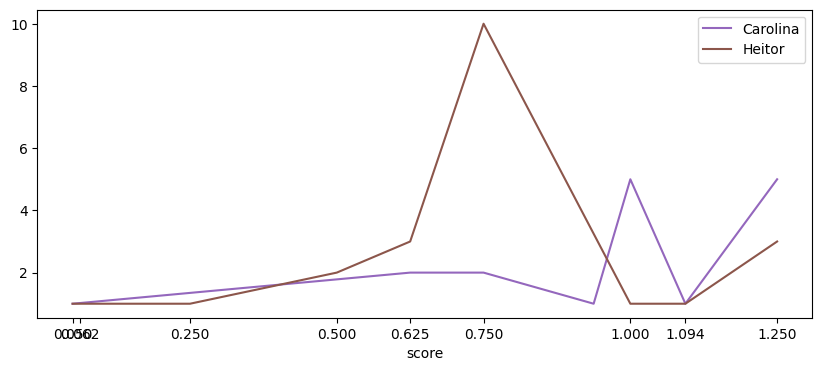

In [440]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
for i,k in zip(all_merge.groupby('nome').groups,[0,1]):
    print(i)
    j = all_merge[all_merge.nome==i]
    rs1 = j.groupby('score').count().sum(axis=1) / j.groupby('score').count().columns.__len__()
    print(j.count().mean())
    print(rs1)
    rs1.plot(kind='bar',ax=ax,width=0.2,position=k,color=plt.cm.tab10(k+4),label=i)
    #all_merge[all_merge.nome==i].count().hist(column='score',sharex=True,grid=False,sharey=True,ax=ax,legend=i)
plt.legend()